In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [7]:
India_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                               (indicator_data['CountryCode'] == 'IN')]

In [8]:
India_df_ind3.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [9]:
ts = India_df_ind3['Value'] 
ts1 = India_df_ind3[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,51.863907
2015-01-01,52.448872
2014-01-01,53.141940
2013-01-01,53.916085
2012-01-01,54.734075


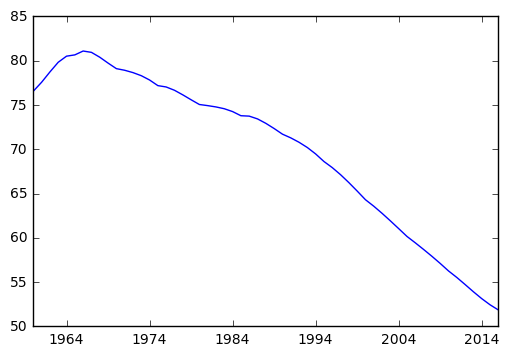

In [10]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


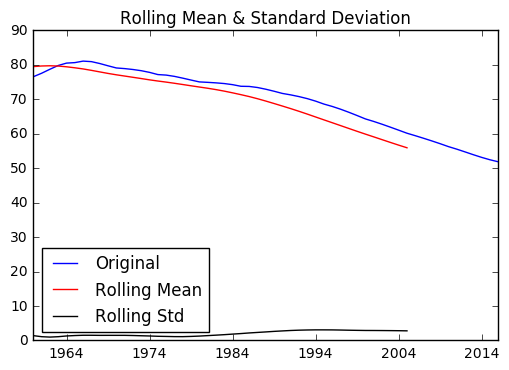

Results of Dickey-Fuller Test:
Test Statistic                 -2.749316
p-value                         0.065886
#Lags Used                     11.000000
Number of Observations Used    45.000000
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
Critical Value (1%)            -3.584829
dtype: float64


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

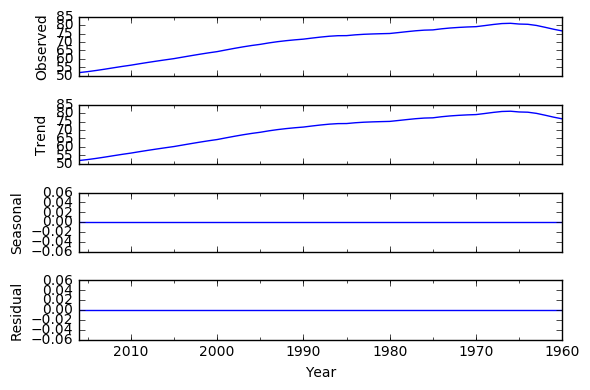

In [12]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [13]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

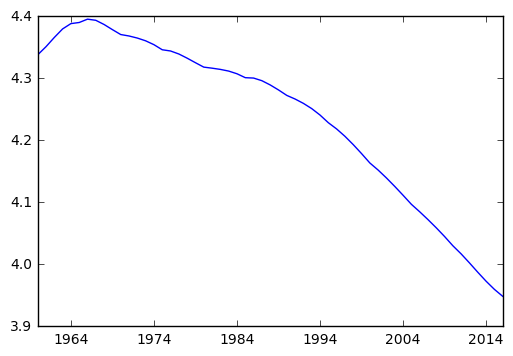

In [14]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


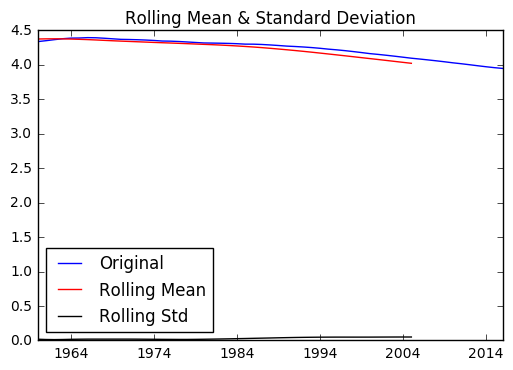

Results of Dickey-Fuller Test:
Test Statistic                 -2.552403
p-value                         0.103239
#Lags Used                     11.000000
Number of Observations Used    45.000000
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
Critical Value (1%)            -3.584829
dtype: float64


In [15]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [16]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


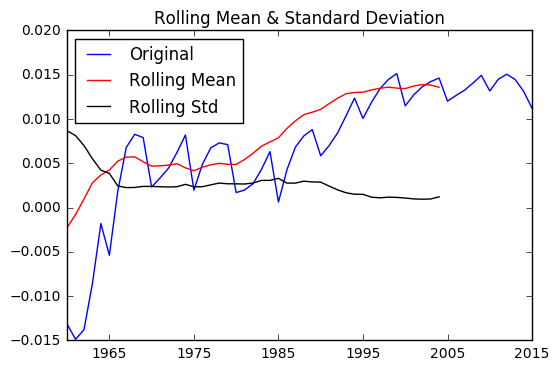

Results of Dickey-Fuller Test:
Test Statistic                 -0.320672
p-value                         0.922525
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
Critical Value (1%)            -3.588573
dtype: float64


In [17]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [18]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


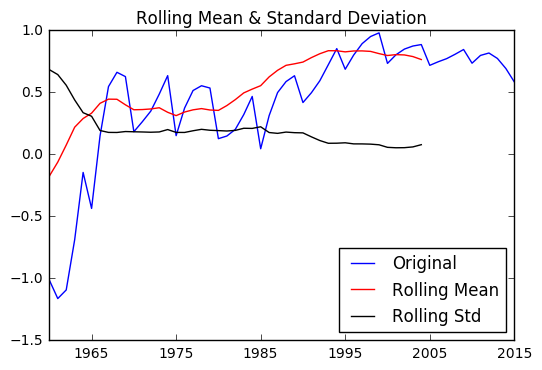

Results of Dickey-Fuller Test:
Test Statistic                 -0.203447
p-value                         0.938110
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
Critical Value (1%)            -3.588573
dtype: float64


In [19]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [20]:
def expWeightedavg(ts1):
    expwighted_avg = pd.ewma(ts1_log, halflife=12)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,ignore_na=False,halflife=12,min_periods=0).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


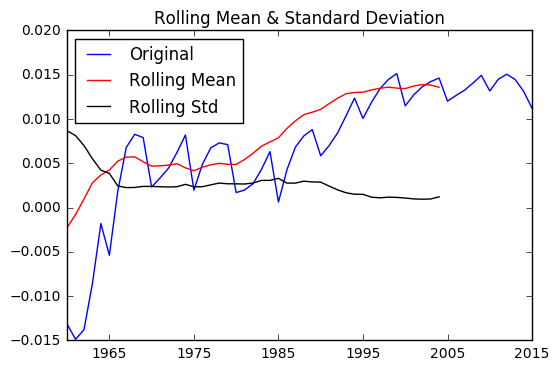

Results of Dickey-Fuller Test:
Test Statistic                 -0.320672
p-value                         0.922525
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
Critical Value (1%)            -3.588573
dtype: float64


In [21]:
ts_log_ewma_diff = expWeightedavg(ts1)
test_stationarity(ts_log_ewma_diff.Value)

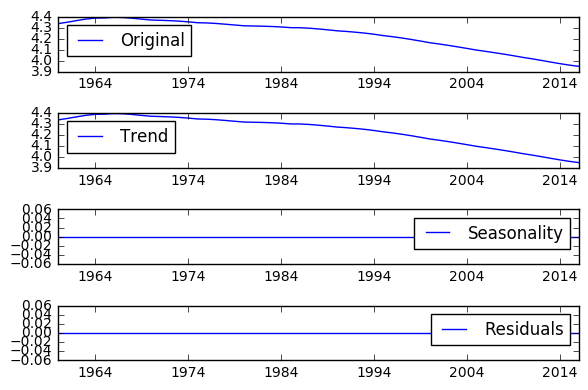

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [23]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

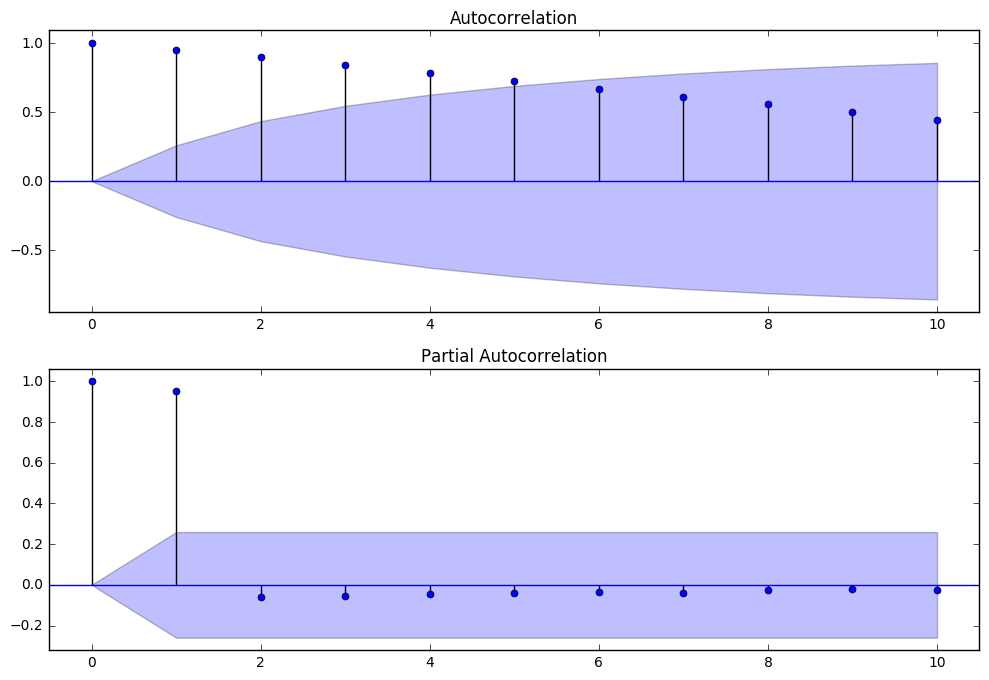

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

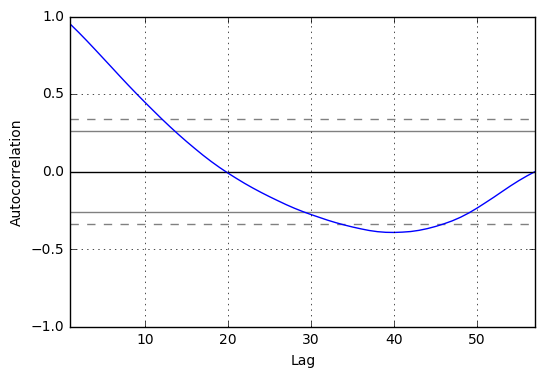

In [25]:
autocorrelation_plot(ts1_log)
plt.show()

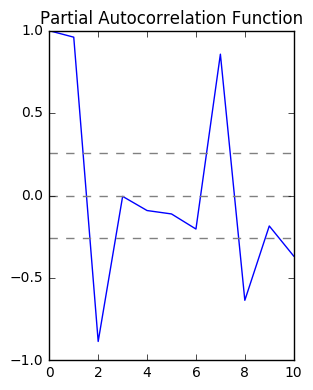

In [26]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [27]:
sm.tsa.arma_order_select_ic(ts1_log, max_ar=4, max_ma=2, ic='aic')

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'aic':             0           1           2
 0  -63.980373 -134.236136 -201.151781
 1 -350.769803 -409.721837 -430.924535
 2 -494.671634 -493.065789 -492.303399
 3 -492.939051 -492.340248 -492.811921
 4 -491.929771 -492.671072         NaN, 'aic_min_order': (2, 0)}

In [28]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [29]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [30]:
def AR_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 2
Coefficients: const          4.132750
ar.L1.Value    1.967709
ar.L2.Value   -0.971543
dtype: float64
2006-01-01    59.469678
Freq: -1AS-JAN, dtype: float64
-494.67163430878327


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


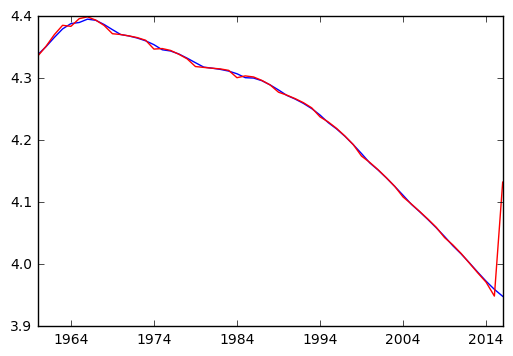

In [31]:
model_AR = AR_Model(ts1_log)

In [48]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 1))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 5))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          4.236954
ma.L1.Value    0.999970
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 1)   Log Likelihood                  70.118
Method:                       css-mle   S.D. of innovations              0.068
Date:                Fri, 18 Aug 2017   AIC                           -134.236
Time:                        13:20:09   BIC                           -128.107
Sample:                    01-01-2016   HQIC                          -131.854
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.2370      0.018    236.422      0.000         4.202     4.272
ma.L1.Value     1.0000      0.043     23.043

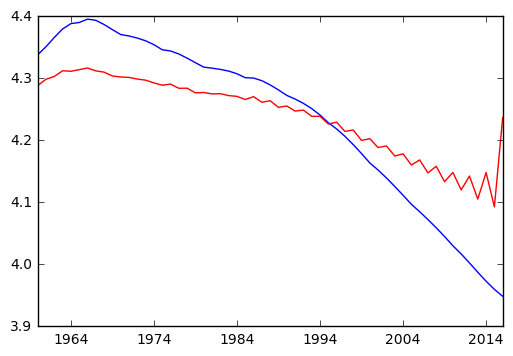

In [49]:
model_MA = MA_Model(ts1_log)

In [50]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 1))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 5))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 2
Coefficients: const          4.130002
ar.L1.Value    1.974543
ar.L2.Value   -0.978369
ma.L1.Value   -0.106445
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(2, 1)   Log Likelihood                 251.533
Method:                       css-mle   S.D. of innovations              0.003
Date:                Fri, 18 Aug 2017   AIC                           -493.066
Time:                        13:24:19   BIC                           -482.851
Sample:                    01-01-2016   HQIC                          -489.096
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.1300      0.093     44.367      0.000         3.948     4.

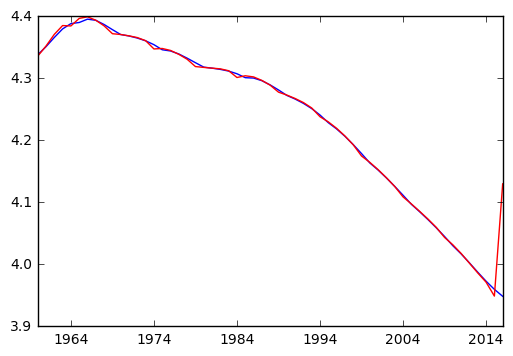

In [51]:
model_Combined = Combined_Model(ts1_log)

In [54]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2, 0, 0))


In [55]:
aic_metric

,AIC,Modelname
0,-494.671634,"ARIMA(ts, order=(2, 0, 0))"
0,-342.484602,"ARIMA(ts, order=(0, 0, 5))"
0,-499.567599,"ARIMA(ts, order=(2,0, 5))"
0,-134.236136,"ARIMA(ts, order=(0, 0, 5))"
0,-134.236136,"ARIMA(ts, order=(0, 0, 5))"
0,-493.065784,"ARIMA(ts, order=(2,0, 5))"


In [56]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    #output=normal(output)
    output = np.exp(output)
    return output

In [57]:
forecast(model_AR,50)

array([ 75.52884718,  74.48599461,  73.43651671,  72.38563077,
        71.33821983,  70.29882314,  69.27163166,  68.26048801,
        67.26889046,  66.30000017,  65.35665141,  64.44136397,
        63.55635743,  62.70356682,  61.88465915,  61.10105052,
        60.35392353,  59.64424451,  58.9727805 ,  58.34011577,
        57.74666755,  57.19270104,  56.6783435 ,  56.20359727,
        55.76835191,  55.37239517,  55.01542295,  54.69704823,
        54.41680898,  54.17417505,  53.96855422,  53.79929728,
        53.66570238,  53.56701855,  53.5024486 ,  53.47115142,
        53.47224369,  53.50480119,  53.56785965,  53.6604154 ,
        53.78142569,  53.92980884,  54.1044444 ,  54.30417313,
        54.52779717,  54.77408021,  55.04174784,  55.32948818,
        55.63595267,  55.95975729])

In [58]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    fittedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    return fittedVal
FittedValues(model_AR)


Predicted existing values are:


Year
2016-01-01    62.349125
2015-01-01    51.882481
2014-01-01    53.058671
2013-01-01    53.857037
2012-01-01    54.709472
2011-01-01    55.568417
2010-01-01    56.344700
2009-01-01    57.015218
2008-01-01    57.968696
2007-01-01    58.735268
2006-01-01    59.469678
2005-01-01    60.189056
2004-01-01    60.876261
2003-01-01    61.926126
2002-01-01    62.784940
2001-01-01    63.606569
2000-01-01    64.361140
1999-01-01    65.023255
1998-01-01    66.245299
1997-01-01    67.162635
1996-01-01    67.995155
1995-01-01    68.701690
1994-01-01    69.271844
1993-01-01    70.286609
1992-01-01    70.878725
1991-01-01    71.342775
1990-01-01    71.742663
1989-01-01    72.081596
1988-01-01    72.926215
1987-01-01    73.464551
1986-01-01    73.873992
1985-01-01    74.003008
1984-01-01    73.788143
1983-01-01    74.666165
1982-01-01    74.842879
1981-01-01    74.927183
1980-01-01    75.023007
1979-01-01    75.128858
1978-01-01    76.061876
1977-01-01    76.631626
1976-01-01    77.106821
1975-01-01 

In [62]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = np.cumsum(np.concatenate((ts1.values[0], predictions_ARIMA_diff)))
    print('normalized')
    #predictions_ARIMA_diff_cumsum=np.absolute(predictions_ARIMA_diff_cumsum)
    return predictions_ARIMA_diff_cumsum